IMPORTACIÓN DE LIBRERÍAS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

PROCESAMIENTO DE DATOS

In [2]:
datos = pd.read_csv('C:/Users/JCfor/Desktop/Proyecto Tesis I/DatasetFinal.csv')
##Variable valor de traspaso
valor = datos['Valor de traspaso'].str.split('-',expand = True)
valor.columns = ['MenorV', 'V_traspaso']
datos = pd.concat( [ datos,valor.V_traspaso ] , axis= 1)

##Variable Sueldo
datos['Sueldo'] = datos['Sueldo'].str.extract('(\d+)', expand=False).astype(float)
datos['Sueldo'] = datos['Sueldo']*1000
datos.head()

datos = datos.drop( ['Inf', 'Source.Name', 'Rec', 'Nombre', 'Club', 'División', 'Posición', 'Edad', 'Sueldo', 'V_traspaso','Valor de traspaso' ], axis=1)

In [3]:
x = np.asanyarray(datos.drop(columns=['Valoracion']))
y=datos['Valoracion']

print(x.shape)
print(y.shape)

(3191, 47)
(3191,)


SEPARACIÓN DEL DATSET Y ESCALAMIENTO DE DATOS

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=3)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=3)

In [5]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

CONSTRUCCIÓN DEL MODELO

In [6]:
modelo = keras.Sequential([
    keras.layers.Dense(6, activation='sigmoid', input_shape=(47,)),
    keras.layers.Dense(1)
])

sgd = tf.keras.optimizers.SGD(learning_rate=0.001,
momentum=0.1)

modelo.compile(optimizer = sgd,
               loss='mse',
               metrics=['mae'])

In [7]:
history = modelo.fit(x_train, y_train, epochs= 600, batch_size= 10, validation_data= (x_test, y_test))

Epoch 1/600
192/192 [==============================] - 1s 2ms/step - loss: 822.3908 - mae: 22.4036 - val_loss: 192.2321 - val_mae: 10.4652
Epoch 2/600
192/192 [==============================] - 0s 1ms/step - loss: 114.3048 - mae: 7.9801 - val_loss: 63.3801 - val_mae: 6.1126
Epoch 3/600
192/192 [==============================] - 0s 1ms/step - loss: 57.2707 - mae: 5.4887 - val_loss: 43.2618 - val_mae: 4.8620
Epoch 4/600
192/192 [==============================] - 0s 1ms/step - loss: 43.3511 - mae: 4.6764 - val_loss: 36.7050 - val_mae: 4.3679
Epoch 5/600
192/192 [==============================] - 0s 1ms/step - loss: 36.8977 - mae: 4.2639 - val_loss: 33.0857 - val_mae: 4.1378
Epoch 6/600
192/192 [==============================] - 0s 1ms/step - loss: 33.3706 - mae: 4.0932 - val_loss: 32.1738 - val_mae: 4.0981
Epoch 7/600
192/192 [==============================] - 0s 2ms/step - loss: 31.1891 - mae: 3.9896 - val_loss: 31.3244 - val_mae: 4.0370
Epoch 8/600
192/192 [=============================

VISUALIZACIÓN DE MÉTRICAS

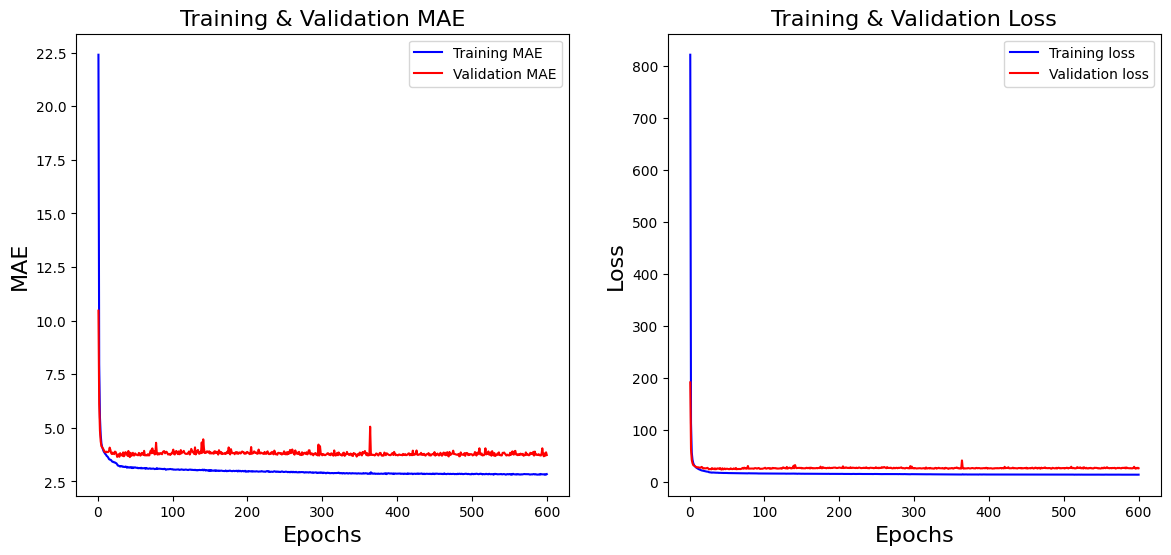

In [8]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values= history_dict['val_loss']
accuracy = history_dict['mae']
val_accuracy = history_dict['val_mae']
 
epochs = range(1, len(loss_values) + 1)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
#
# Plot the model accuracy (MAE) vs Epochs
#
ax[0].plot(epochs, accuracy, 'b', label='Training MAE')
ax[0].plot(epochs, val_accuracy, 'r', label='Validation MAE')
ax[0].set_title('Training & Validation MAE', fontsize=16)
ax[0].set_xlabel('Epochs', fontsize=16)
ax[0].set_ylabel('MAE', fontsize=16)
ax[0].legend()
#
# Plot the loss vs Epochs
#
ax[1].plot(epochs, loss_values, 'b', label='Training loss')
ax[1].plot(epochs, val_loss_values, 'r', label='Validation loss')
ax[1].set_title('Training & Validation Loss', fontsize=16)
ax[1].set_xlabel('Epochs', fontsize=16)
ax[1].set_ylabel('Loss', fontsize=16)
ax[1].legend()

R CUADRADO AJUSTADO

In [10]:
from sklearn.metrics import r2_score
y_train_pred = modelo.predict(x_train)
y_test_pred = modelo.predict(x_test)

print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_test_pred)))

20/20 [==============================] - 0s 974us/step
The R2 score on the Train set is:	0.961
The R2 score on the Test set is:	0.924
